# Programming Exercise 1: Linear Regression

## Introduction

In this exercise, you will implement linear regression and get to see it work on data. We will be using [`numpy`](http://www.numpy.org/) for all arrays and matrix operations, and [`matplotlib`](https://matplotlib.org/) for plotting.



In [2]:
pwd

'/home/jovyan/binder'

In [2]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces
# tells matplotlib to embed plots within the notebook
%matplotlib inline



## Debugging

Here are some things to keep in mind throughout this exercise:

- Python array indices start from zero, not one (contrary to OCTAVE/MATLAB). 

- There is an important distinction between python arrays (called `list` or `tuple`) and `numpy` arrays. You should use `numpy` arrays in all your computations. Vector/matrix operations work only with `numpy` arrays. Python lists do not support vector operations (you need to use for loops).

- If you are seeing many errors at runtime, inspect your matrix operations to make sure that you are adding and multiplying matrices of compatible dimensions. Printing the dimensions of `numpy` arrays using the `shape` property will help you debug.

- By default, `numpy` interprets math operators to be element-wise operators. If you want to do matrix multiplication, you need to use the `dot` function in `numpy`. For, example if `A` and `B` are two `numpy` matrices, then the matrix operation AB is `np.dot(A, B)`. Note that for 2-dimensional matrices or vectors (1-dimensional), this is also equivalent to `A@B` (requires python >= 3.5).

<a id="section1"></a>
## 1 Simple python and `numpy` function

The first part of this assignment gives you practice with python and `numpy` syntax and the homework submission process. In the next cell, you will find the outline of a `python` function. Modify it to return a 5 x 5 identity matrix by filling in the following code:

```python
A = np.eye(5)
```
<a id="warmUpExercise"></a>

In [4]:
import numpy as np
def warmUpExercise():
    """
    Example function in Python which computes the identity matrix.
    
    Returns
    -------
    A : array_like
        The 5x5 identity matrix.
    
    Instructions
    ------------
    Return the 5x5 identity matrix.
    """    
    # ======== YOUR CODE HERE ======
    A = np.eye(5)  # modify this line
    
    # ==============================
    return A

The previous cell only defines the function `warmUpExercise`. We can now run it by executing the following cell to see its output. You should see output similar to the following:

```python
array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])
```

In [7]:
warmUpExercise()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

## 2 Linear regression with one variable

Now you will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next. 

The file `Data/ex1data1.txt` contains the dataset for our linear regression problem. The first column is the population of a city (in 10,000s) and the second column is the profit of a food truck in that city (in $10,000s). A negative value for profit indicates a loss. 

We provide you with the code needed to load this data. The dataset is loaded from the data file into the variables `x` and `y`:

In [9]:
# used for manipulating directory paths
import os
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D 
# Scientific and vector computation for python
import numpy as np
# Read comma separated data
data = np.loadtxt(os.path.join('Data', 'ex1data1.txt'), delimiter=',')
X, y = data[:, 0], data[:, 1]

m = y.size  # number of training exam
# The population of a city in 10,000

def plotData(X, y):
    fig = pyplot.figure()  # open a new figure
    
    #MEC stands for Mark Edge Color to define the Color of the broder of the data point for easy visibility     
    # ====================== YOUR CODE HERE ======================= 
    pyplot.plot(X, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Profit in $10,000')
    pyplot.xlabel('Population of City in 10,000s')
    

[ 6.1101  5.5277  8.5186  7.0032  5.8598  8.3829  7.4764  8.5781  6.4862
  5.0546  5.7107 14.164   5.734   8.4084  5.6407  5.3794  6.3654  5.1301
  6.4296  7.0708  6.1891 20.27    5.4901  6.3261  5.5649 18.945  12.828
 10.957  13.176  22.203   5.2524  6.5894  9.2482  5.8918  8.2111  7.9334
  8.0959  5.6063 12.836   6.3534  5.4069  6.8825 11.708   5.7737  7.8247
  7.0931  5.0702  5.8014 11.7     5.5416  7.5402  5.3077  7.4239  7.6031
  6.3328  6.3589  6.2742  5.6397  9.3102  9.4536  8.8254  5.1793 21.279
 14.908  18.959   7.2182  8.2951 10.236   5.4994 20.341  10.136   7.3345
  6.0062  7.2259  5.0269  6.5479  7.5386  5.0365 10.274   5.1077  5.7292
  5.1884  6.3557  9.7687  6.5159  8.5172  9.1802  6.002   5.5204  5.0594
  5.7077  7.6366  5.8707  5.3054  8.2934 13.394   5.4369]


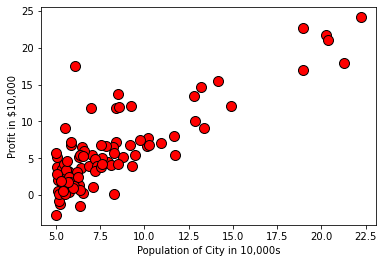

In [23]:
plotData(X,y)



In [10]:
 X = np.stack([np.ones(m), X], axis=1)



In [66]:
len(y)

97

In [15]:
def computeCost(X, y, theta):
     # initialize some useful values
    m = y.size  # number of training examples
    
    # You need to return the following variables correctly

    
    J = 0
    
    # ====================== YOUR CODE HERE =====================
    for i in range(len(X)): 
        hx_i=np.dot(theta,X[i,:])
        J=J + (hx_i-y[i])**2 

    return (J/(2*m))
    
    # ===========================================================

J = computeCost(X, y, theta=np.array([-1,2]))

print(J)


54.24245508201238


In [16]:
J = computeCost(X, y, theta=np.array([0.0, 0.0]))
print('With theta = [0, 0] \nCost computed = %.2f' % J)
print('Expected cost value (approximately) 32.07\n')

# further testing of the cost function
J = computeCost(X, y, theta=np.array([-1, 2]))
print('With theta = [-1, 2]\nCost computed = %.2f' % J)
print('Expected cost value (approximately) 54.24')


With theta = [0, 0] 
Cost computed = 32.07
Expected cost value (approximately) 32.07

With theta = [-1, 2]
Cost computed = 54.24
Expected cost value (approximately) 54.24


In [18]:
def gradientDescent(X, y, theta, alpha, num_iters):
     # Initialize some useful values
    m = y.shape[0]  # number of training examples
    
    # make a copy of theta, to avoid changing the original array, since numpy arrays
    # are passed by reference to functions
    theta = theta.copy()
    
    J_history = [] # Use a python list to save cost in every iteration
    
    for i in range(num_iters):
        alphabym=alpha/m
        sumofh0x=np.dot(X,theta)
        theta=theta-((alpha/m)*(np.dot(X.T,sumofh0x-y)))

        # save the cost J in every iteration
        J_history.append(computeCost(X, y, theta))
    
    return theta, J_history
# initialize fitting parameters
theta = np.zeros(2)

# some gradient descent settings
iterations = 1500
alpha = 0.01

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print('Theta found by gradient descent: {:.4f}, {:.4f}'.format(*theta))
print('Expected theta values (approximately): [-3.6303, 1.1664]')

Theta found by gradient descent: -3.6303, 1.1664
Expected theta values (approximately): [-3.6303, 1.1664]


[ 6.1101  5.5277  8.5186  7.0032  5.8598  8.3829  7.4764  8.5781  6.4862
  5.0546  5.7107 14.164   5.734   8.4084  5.6407  5.3794  6.3654  5.1301
  6.4296  7.0708  6.1891 20.27    5.4901  6.3261  5.5649 18.945  12.828
 10.957  13.176  22.203   5.2524  6.5894  9.2482  5.8918  8.2111  7.9334
  8.0959  5.6063 12.836   6.3534  5.4069  6.8825 11.708   5.7737  7.8247
  7.0931  5.0702  5.8014 11.7     5.5416  7.5402  5.3077  7.4239  7.6031
  6.3328  6.3589  6.2742  5.6397  9.3102  9.4536  8.8254  5.1793 21.279
 14.908  18.959   7.2182  8.2951 10.236   5.4994 20.341  10.136   7.3345
  6.0062  7.2259  5.0269  6.5479  7.5386  5.0365 10.274   5.1077  5.7292
  5.1884  6.3557  9.7687  6.5159  8.5172  9.1802  6.002   5.5204  5.0594
  5.7077  7.6366  5.8707  5.3054  8.2934 13.394   5.4369]


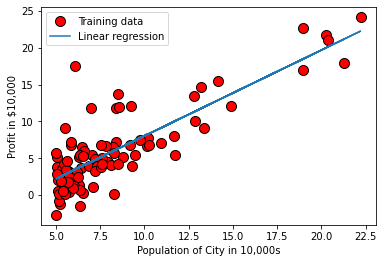

In [34]:
# plot the linear fit
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')
pyplot.legend(['Training data', 'Linear regression']);


In [35]:
# Predict values for population sizes of 35,000 and 70,000
predict1 = np.dot([1, 3.5], theta)
print('For population = 35,000, we predict a profit of {:.2f}\n'.format(predict1*10000))

predict2 = np.dot([1, 7], theta)
print('For population = 70,000, we predict a profit of {:.2f}\n'.format(predict2*10000))

For population = 35,000, we predict a profit of 4519.77

For population = 70,000, we predict a profit of 45342.45



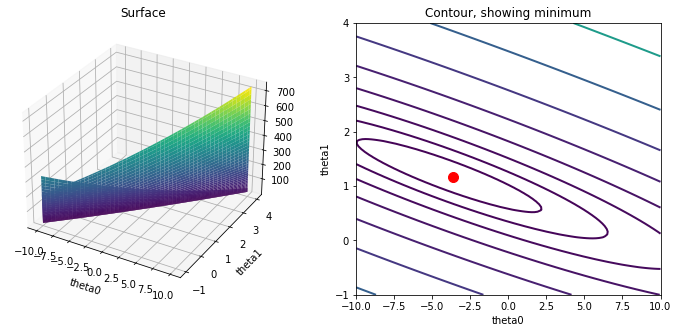

In [19]:
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Fill out J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = computeCost(X, y, [theta0, theta1])
        
        
# Because of the way meshgrids work in the surf command, we need to
# transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals.T

# surface plot
fig = pyplot.figure(figsize=(12, 5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.title('Surface')

# contour plot
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
ax = pyplot.subplot(122)
pyplot.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.plot(theta[0], theta[1], 'ro', ms=10, lw=2)
pyplot.title('Contour, showing minimum')
pass



If you have successfully completed the material above, congratulations! You now understand linear regression and should able to start using it on your own datasets.

For the rest of this programming exercise, we have included the following optional exercises. These exercises will help you gain a deeper understanding of the material, and if you are able to do so, we encourage you to complete them as well. You can still submit your solutions to these exercises to check if your answers are correct.

## 3 Linear regression with multiple variables

In this part, you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.

The file `Data/ex1data2.txt` contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price
of the house. 

<a id="section4"></a>
### 3.1 Feature Normalization

We start by loading and displaying some values from this dataset. By looking at the values, note that house sizes are about 1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly.

price            1.000000
sqft_living      0.701492
grade            0.662583
sqft_above       0.604963
sqft_living15    0.599256
bathrooms        0.523706
view             0.403321
sqft_basement    0.324877
lat              0.309013
bedrooms         0.302998
Name: price, dtype: float64 

waterfront      0.275296
yr_renovated    0.137104
sqft_lot        0.088863
sqft_lot15      0.078733
condition       0.047493
yr_built        0.036774
long            0.011829
date            0.001875
id             -0.015349
zipcode        -0.042484
Name: price, dtype: float64
['date' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot' 'floors'
 'waterfront' 'view' 'condition' 'grade' 'sqft_above' 'sqft_basement'
 'yr_built' 'yr_renovated' 'zipcode' 'lat' 'long' 'sqft_living15'
 'sqft_lot15']
count    1.799900e+04
mean     5.330743e+05
std      3.644122e+05
min      7.500000e+04
25%      3.150000e+05
50%      4.470000e+05
75%      6.354750e+05
max      7.700000e+06
Name: price, dtype: float64
Skew is: 4.2

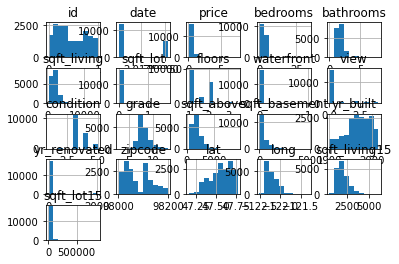

(17999, 19)


In [14]:
# Load data
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces
# tells matplotlib to embed plots within the notebook
%matplotlib inline
kf = KFold(n_splits=10, random_state=42,shuffle =True)

#path='C:\coers\pc\Desktop\Machine Learning\house_prices_data_training_data.csv'
df = pd.read_csv(r"C:\Users\pc\Desktop\Machine Learning\house_prices_data_training_data.csv")
df=pd.DataFrame(df)
corr = df.corr()  #measuring the correlation between the features and the price
print (corr['price'].sort_values(ascending=False)[:10], '\n')
print (corr['price'].sort_values(ascending=False)[-10:])
df['bathrooms'] = df['bathrooms'].astype(int)
df = df.dropna()  #to get rid of the Nan values
df.hist()
X=df.loc[:, ~df.columns.isin(['price','id'])]
columns=X.columns.to_numpy()
print(columns)
y= df.loc[:,'price']
print(y.describe())
print ("Skew is:", y.skew())
pyplot.hist(y, color='blue')
pyplot.show()
X=X.to_numpy()
y=y.to_numpy()

#     # print out some data points
print(X.shape)
# print(X_cv.shape[0])
# print(X_test.shape[0])


Your task here is to complete the code in `featureNormalize` function:
- Subtract the mean value of each feature from the dataset.
- After subtracting the mean, additionally scale (divide) the feature values by their respective “standard deviations.”

The standard deviation is a way of measuring how much variation there is in the range of values of a particular feature (most data points will lie within ±2 standard deviations of the mean); this is an alternative to taking the range of values (max-min). In `numpy`, you can use the `std` function to compute the standard deviation. 

For example, the quantity `X[:, 0]` contains all the values of $x_1$ (house sizes) in the training set, so `np.std(X[:, 0])` computes the standard deviation of the house sizes.
At the time that the function `featureNormalize` is called, the extra column of 1’s corresponding to $x_0 = 1$ has not yet been added to $X$. 

You will do this for all the features and your code should work with datasets of all sizes (any number of features / examples). Note that each column of the matrix $X$ corresponds to one feature.

<div class="alert alert-block alert-warning">
**Implementation Note:** When normalizing the features, it is important
to store the values used for normalization - the mean value and the standard deviation used for the computations. After learning the parameters
from the model, we often want to predict the prices of houses we have not
seen before. Given a new x value (living room area and number of bedrooms), we must first normalize x using the mean and standard deviation that we had previously computed from the training set.
</div>
<a id="featureNormalize"></a>

In [15]:
def  featureNormalize(X):
    """
    Normalizes the features in X. returns a normalized version of X where
    the mean value of each feature is 0 and the standard deviation
    is 1. This is often a good preprocessing step to do when working with
    learning algorithms.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n).
    
    Returns
    -------
    X_norm : array_like
        The normalized dataset of shape (m x n).
    
    Instructions
    ------------
    First, for each feature dimension, compute the mean of the feature
    and subtract it from the dataset, storing the mean value in mu. 
    Next, compute the  standard deviation of each feature and divide
    each feature by it's standard deviation, storing the standard deviation 
    in sigma. 
    
    Note that X is a matrix where each column is a feature and each row is
    an example. You needto perform the normalization separately for each feature. 
    
    Hint
    ----
    You might find the 'np.mean' and 'np.std' functions useful.
    """
    # You need to set these values correctly
    X_norm = X.copy()
    mu = np.zeros(X.shape[1]) #As the 1st 2 columns aren't represented by numbers so no mean and std for them
    sigma = np.zeros(X.shape[1])
    col=np.size(X,1)
    # =========================== YOUR CODE HERE =====================
    
    for j in range(col):
        mu[j]=np.mean(X[:,j])
        sigma[j]=np.std(X[:,j])
        X_norm[:,j]=(X[:,j]-mu[j])/sigma[j]    
    
   
    # ================================================================
    return X_norm

Execute the next cell to run the implemented `featureNormalize` function.

In [147]:
?np.std

In [43]:
# Add intercept term to X
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

#X = np.concatenate([np.ones((y.size, 1)), X_norm], axis=1) #we normalized the X_train 

for train_i, test_index in kf.split(X, y):  #splitting the data into training and testing
    X_org , X_test = X[train_i,:],X[test_index,:]
    y_org , y_test = y[train_i] , y[test_index]
for train_index,cv_index in kf.split(X_org,y_org): #splitting the training FURTHER into train and crossValidation
    X_train , X_cv = X_org[train_index,:],X_org[cv_index,:]
    y_train , y_cv = y_org[train_index] , y_org[cv_index]

    # print out some data points
# call featureNormalize on the loaded data
X_train = featureNormalize(X_train)
X_test =featureNormalize(X_test)
X_cv=featureNormalize(X_cv)


X_train = np.concatenate([np.ones((X_train.shape[0], 1)), X_train], axis=1) #we normalized the X_train 
X_test = np.concatenate([np.ones((X_test.shape[0], 1)), X_test], axis=1) #we normalized the X_train 
X_cv = np.concatenate([np.ones((X_cv.shape[0], 1)), X_cv], axis=1) #we normalized the X_train 
print(X_train.shape)
print(X_cv.shape[0])
print(X_test.shape[0])
#This warning appears as y doesn't have many classes to split upon it's all prices unlike the X
print(X_test**2) 

(14580, 20)
1620
1799
[[1.         2.12274621 0.15635196 ... 1.71779353 0.36277266 0.04554927]
 [1.         0.56897971 2.20453954 ... 0.30369647 0.84090285 0.08050174]
 [1.         0.41710182 0.15635196 ... 1.46599587 0.73904103 0.00908048]
 ...
 [1.         2.25106219 6.62611807 ... 0.33595811 0.29631225 0.06597703]
 [1.         0.44529311 0.48155533 ... 0.26187957 0.01012961 0.04206337]
 [1.         0.51088172 2.20453954 ... 0.03371638 0.6669589  0.05370251]]


<a id="section5"></a>
### 3.2 Gradient Descent

Previously, you implemented gradient descent on a univariate regression problem. The only difference now is that there is one more feature in the matrix $X$. The hypothesis function and the batch gradient descent update
rule remain unchanged. 

You should complete the code for the functions `computeCostMulti` and `gradientDescentMulti` to implement the cost function and gradient descent for linear regression with multiple variables. If your code in the previous part (single variable) already supports multiple variables, you can use it here too.
Make sure your code supports any number of features and is well-vectorized.
You can use the `shape` property of `numpy` arrays to find out how many features are present in the dataset.

<div class="alert alert-block alert-warning">
**Implementation Note:** In the multivariate case, the cost function can
also be written in the following vectorized form:

$$ J(\theta) = \frac{1}{2m}(X\theta - \vec{y})^T(X\theta - \vec{y}) $$

where 

$$ X = \begin{pmatrix}
          - (x^{(1)})^T - \\
          - (x^{(2)})^T - \\
          \vdots \\
          - (x^{(m)})^T - \\ \\
        \end{pmatrix} \qquad \mathbf{y} = \begin{bmatrix} y^{(1)} \\ y^{(2)} \\ \vdots \\ y^{(m)} \\\end{bmatrix}$$

the vectorized version is efficient when you are working with numerical computing tools like `numpy`. If you are an expert with matrix operations, you can prove to yourself that the two forms are equivalent.
</div>

<a id="computeCostMulti"></a>

In [17]:
def computeCostMulti(X_t, y_t, theta ):
    """
    Compute cost for linear regression with multiple variables.
    Computes the cost of using theta as the parameter for linear regression to fit the data points in X and y.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        A vector of shape (m, ) for the values at a given data point.
    
    theta : array_like
        The linear regression parameters. A vector of shape (n+1, )
    
    Returns
    -------
    J : float
        The value of the cost function. 
    
    Instructions
    ------------
    Compute the cost of a particular choice of theta. You should set J to the cost.
    """
    # Initialize some useful values
    m = y_t.shape[0] # number of training examples
    
    # You need to return the following variable correctly
    J_t = 0
    hx_t=0
    # ======================= YOUR CODE HERE ===========================
    
    for i in range(len(X_t)): 
        hx_t=np.dot(theta,X_t[i,:])
        J_t=J_t + (hx_t-y_t[i])**2 
    
    
    # ==================================================================
    return J_t/(2*m)


In [18]:
def gradientDescentMulti(X_train, y_train, theta, alpha, num_iters):
    """
    Performs gradient descent to learn theta.
    Updates theta by taking num_iters gradient steps with learning rate alpha.
        
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        A vector of shape (m, ) for the values at a given data point.
    
    theta : array_like
        The linear regression parameters. A vector of shape (n+1, )
    
    alpha : float
        The learning rate for gradient descent. 
    
    num_iters : int
        The number of iterations to run gradient descent. 
    
    Returns
    -------
    theta : array_like
        The learned linear regression parameters. A vector of shape (n+1, ).
    
    J_history : list
        A python list for the values of the cost function after each iteration.
    
    Instructions
    ------------
    Peform a single gradient step on the parameter vector theta.

    While debugging, it can be useful to print out the values of 
    the cost function (computeCost) and gradient here.
    """
    
    # Initialize some useful values
    m = y_train.shape[0] # number of training examples
    
    # make a copy of theta, which will be updated by gradient descent
    theta = theta.copy()
    
    Jt_history = [] #J training history
    
    for i in range(num_iters):
        # ======================= YOUR CODE HERE ==========================
        hypothesis=0
        alphabym=alpha/m
        hypothesis=(X_train).dot(theta)
        theta=theta-(alphabym*((hypothesis-y_train).dot(X_train)))
        # =================================================================
        
        # save the cost J in every iteration
        Jt_history.append(computeCostMulti(X_train, y_train, theta))
        
    return theta, Jt_history

#### 3.2.1  Selecting learning rates

In this part of the exercise, you will get to try out different learning rates for the dataset and find a learning rate that converges quickly. You can change the learning rate by modifying the following code and changing the part of the code that sets the learning rate.

Use your implementation of `gradientDescentMulti` function and run gradient descent for about 50 iterations at the chosen learning rate. The function should also return the history of $J(\theta)$ values in a vector $J$.

After the last iteration, plot the J values against the number of the iterations.

If you picked a learning rate within a good range, your plot look similar as the following Figure. 

![](Figures/learning_rate.png)

If your graph looks very different, especially if your value of $J(\theta)$ increases or even blows up, adjust your learning rate and try again. We recommend trying values of the learning rate $\alpha$ on a log-scale, at multiplicative steps of about 3 times the previous value (i.e., 0.3, 0.1, 0.03, 0.01 and so on). You may also want to adjust the number of iterations you are running if that will help you see the overall trend in the curve.

<div class="alert alert-block alert-warning">
**Implementation Note:** If your learning rate is too large, $J(\theta)$ can diverge and ‘blow up’, resulting in values which are too large for computer calculations. In these situations, `numpy` will tend to return
NaNs. NaN stands for ‘not a number’ and is often caused by undefined operations that involve −∞ and +∞.
</div>

<div class="alert alert-block alert-warning">
**MATPLOTLIB tip:** To compare how different learning learning rates affect convergence, it is helpful to plot $J$ for several learning rates on the same figure. This can be done by making `alpha` a python list, and looping across the values within this list, and calling the plot function in every iteration of the loop. It is also useful to have a legend to distinguish the different lines within the plot. Search online for `pyplot.legend` for help on showing legends in `matplotlib`.
</div>

Notice the changes in the convergence curves as the learning rate changes. With a small learning rate, you should find that gradient descent takes a very long time to converge to the optimal value. Conversely, with a large learning rate, gradient descent might not converge or might even diverge!
Using the best learning rate that you found, run the script
to run gradient descent until convergence to find the final values of $\theta$. Next,
use this value of $\theta$ to predict the price of a house with 1650 square feet and
3 bedrooms. You will use value later to check your implementation of the normal equations. Don’t forget to normalize your features when you make this prediction!

theta computed from gradient descent: [523159.38489614  13432.75525104 -24912.68232428  33246.45508861
  75302.78473767   6529.84868743   2676.46668575  53392.82509934
  41856.28371896  23718.56125244  88498.32784046  68516.93617248
  28241.40884283 -66047.70925328  13824.36702108 -21759.65983838
  81455.39787741 -25039.70672078  42836.29157526  -9451.40889521]
280000.0
Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): $283538


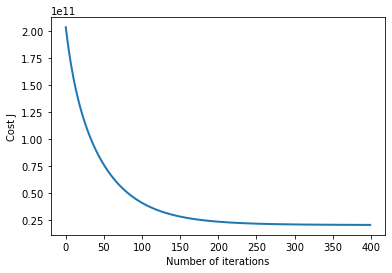

In [19]:
"""
Instructions
------------
We have provided you with the following starter code that runs
gradient descent with a particular learning rate (alpha). 

Your task is to first make sure that your functions - `computeCost`
and `gradientDescent` already work with  this starter code and
support multiple variables.

After that, try running gradient descent with different values of
alpha and see which one gives you the best result.

Finally, you should complete the code at the end to predict the price
of a 1650 sq-ft, 3 br house.

Hint
----
At prediction, make sure you do the same feature normalization.
"""
# Choose some alpha value - change this
alpha = 0.01
num_iters = 400

# init theta and run gradient descent
theta = np.zeros(20)
theta, Jt_history = gradientDescentMulti(X_train, y_train, theta, alpha, num_iters)

# Plot the convergence graph
pyplot.plot(np.arange(len(Jt_history)), Jt_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')

# Display the gradient descent's result
print('theta computed from gradient descent: {:s}'.format(str(theta)))

# Estimate the price of a 1650 sq-ft, 3 br house
# ======================= YOUR CODE HERE ===========================
# Recall that the first column of X is all-ones. 
# Thus, it does not need to be normalized.

normalize_test_data = None
normalize_test_data = None
X_entry=X_train[25]
       #the outer bound not inculded from 1 to 2 
price = np.dot(X_entry,theta)
# print 'Predicted price of a 1650 sq-ft, 3 br house:', price

# ===================================================================
print(y_train[25])
print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): ${:.0f}'.format(price))
# J_test=CostMulti(X_test, y_test, theta )
# print(J_test)

In [41]:
def x_transform(var,degrees):
    Jtest_history=np.zeros(degrees)
    # X --> Input.
    # degrees --> A list, We add X^(value) feature to the input
    #             where value is one of the values in the list.
    
    # making a copy of X.
    t = var.copy()
    scaler = StandardScaler()
    # Appending columns of higher degrees to X.
    for deg in range(degrees):
        var[:,deg] =  t[:,deg]**deg

        Jtest_history[deg]=computeCostMulti(scaler.fit_transform(var), y_test,theta) 
    return Jtest_history

Text(0, 0.5, 'Cost J test')

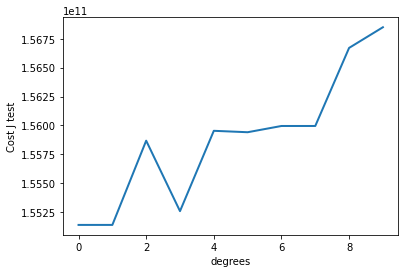

In [44]:
y_plot=0
y_plot=x_transform(X_test,10)
pyplot.plot(np.arange(10), y_plot, lw=2)
pyplot.xlabel('degrees')
pyplot.ylabel('Cost J test') 

<a id="section7"></a>
### 3.3 Normal Equations
You learned that the closed-form solution to linear regression is

$$ \theta = \left( X^T X\right)^{-1} X^T\vec{y}$$

Using this formula does not require any feature scaling, and you will get an exact solution in one calculation: there is no “loop until convergence” like in gradient descent. 

First, we will reload the data to ensure that the variables have not been modified. Remember that while you do not need to scale your features, we still need to add a column of 1’s to the $X$ matrix to have an intercept term ($\theta_0$). The code in the next cell will add the column of 1’s to X for you.

In [ ]:
# Load data
data = np.loadtxt(os.path.join('Data', 'ex1data2.txt'), delimiter=',')
X = data[:, :2]
y = data[:, 2]
m = y.size
X = np.concatenate([np.ones((m, 1)), X], axis=1)

Complete the code for the function `normalEqn` below to use the formula above to calculate $\theta$. 

<a id="normalEqn"></a>

In [45]:
def normalEqn(X, y):
    """
    Computes the closed-form solution to linear regression using the normal equations.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        The value at each data point. A vector of shape (m, ).
    
    Returns
    -------
    theta : array_like
        Estimated linear regression parameters. A vector of shape (n+1, ).
    
    Instructions
    ------------
    Complete the code to compute the closed form solution to linear
    regression and put the result in theta.
    
    Hint
    ----
    Look up the function `np.linalg.pinv` for computing matrix inverse.
    """
    theta = np.zeros(X.shape[1])
    fst_term=np.linalg.inv(np.matmul(X.T,X))  #(X^TX)^-1
    snd_term=np.matmul(X.T,y)
    # ===================== YOUR CODE HERE ============================
    theta= np.matmul(fst_term,snd_term)
    # =================================================================
    return theta

Now, once you have found $\theta$ using this
method, use it to make a price prediction for a 1650-square-foot house with
3 bedrooms. You should find that gives the same predicted price as the value
you obtained using the model fit with gradient descent (in Section 3.2.1).

In [46]:
# Calculate the parameters from the normal equation
theta = normalEqn(X, y);

# Display normal equation's result
print('Theta computed from the normal equations: {:s}'.format(str(theta)));

# Estimate the price of a 1650 sq-ft, 3 br house
# ====================== YOUR CODE HERE ======================
x=[1,1650,3]
x[1:3]=(x[1:3]-mu[1:3])/sigma[1:3]
price=np.dot(x,theta)

print(price)
# ============================================================

print('Predicted price of a 1650 sq-ft, 3 br house (using normal equations): ${:.0f}'.format(price))

Theta computed from the normal equations: [89597.9095428    139.21067402 -8738.01911233]
396094.3046704623
Predicted price of a 1650 sq-ft, 3 br house (using normal equations): $396094
